<h2><center> PyTorch: Stochastic Gradient Descent and Neural Networks </center> </h2>

In [16]:
import torch  # now import the tensorflow module
from torch import nn
import numpy as np 

## 1 Create Linear Regression Model

In [17]:
from torch import nn

class MyLinearRegressionModel(nn.Module): 
    def __init__(self,d): # d is the dimension of the input
        super(MyLinearRegressionModel,self).__init__()   # call the init function of super class
        # we usually create variables for all our model parameters (w and b in our case) in __init__ and give them initial values. 
        # need to create them as nn.Parameter so that the model knows it is an parameter that needs to be trained
        self.w = nn.Parameter(torch.zeros(1,d, dtype=torch.float)) 
        self.b = nn.Parameter(torch.zeros(1,dtype=torch.float))
    def forward(self,x):
        # The main purpose of the forward function is to specify given input x, how the output is calculated. 
        return torch.inner(x,self.w) + self.b
    
# Let's check out our model 

mymodel = MyLinearRegressionModel(1) # creating a model instance with input dimension 1
print(mymodel.w)
print(mymodel.b)


Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


## 2 Creating Dataset and DataLoader

The torch Dataset is similar to tf.data.Dataset. The general way to create a dataset is through subclassing the Dataset class and define the `__len__()` and `__getitem__()` method. 

In [18]:
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

x = torch.arange(0,10,.1,dtype=torch.float) 
x = x[:,None]
y = x*3+torch.randn(x.shape)

# Example of dataset 
class MyDataset(Dataset): 
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return (self.x[idx],self.y[idx])


In [19]:
mydataset = MyDataset(x,y)
for item in mydataset:
    print(item)

(tensor([0.]), tensor([1.7147]))
(tensor([0.1000]), tensor([-0.3465]))
(tensor([0.2000]), tensor([1.4514]))
(tensor([0.3000]), tensor([0.1944]))
(tensor([0.4000]), tensor([0.1326]))
(tensor([0.5000]), tensor([2.4647]))
(tensor([0.6000]), tensor([3.0037]))
(tensor([0.7000]), tensor([2.6963]))
(tensor([0.8000]), tensor([1.2480]))
(tensor([0.9000]), tensor([2.7200]))
(tensor([1.]), tensor([4.3581]))
(tensor([1.1000]), tensor([2.8151]))
(tensor([1.2000]), tensor([3.9455]))
(tensor([1.3000]), tensor([3.6549]))
(tensor([1.4000]), tensor([4.2584]))
(tensor([1.5000]), tensor([5.8701]))
(tensor([1.6000]), tensor([4.0718]))
(tensor([1.7000]), tensor([3.9581]))
(tensor([1.8000]), tensor([4.4133]))
(tensor([1.9000]), tensor([7.0332]))
(tensor([2.]), tensor([4.5765]))
(tensor([2.1000]), tensor([7.9880]))
(tensor([2.2000]), tensor([6.6236]))
(tensor([2.3000]), tensor([7.4462]))
(tensor([2.4000]), tensor([7.3180]))
(tensor([2.5000]), tensor([7.8794]))
(tensor([2.6000]), tensor([7.9515]))
(tensor([2.7

In [20]:
mydataloader = DataLoader(mydataset, batch_size = 4, shuffle = True)
for item in mydataloader:
    print(item)

[tensor([[8.2000],
        [0.0000],
        [6.4000],
        [2.0000]]), tensor([[25.9434],
        [ 1.7147],
        [17.5073],
        [ 4.5765]])]
[tensor([[2.4000],
        [2.9000],
        [4.0000],
        [6.0000]]), tensor([[ 7.3180],
        [ 8.5293],
        [12.1536],
        [15.4184]])]
[tensor([[5.2000],
        [2.7000],
        [4.4000],
        [2.3000]]), tensor([[15.6512],
        [ 8.8156],
        [14.0342],
        [ 7.4462]])]
[tensor([[0.2000],
        [3.2000],
        [0.7000],
        [7.0000]]), tensor([[ 1.4514],
        [11.5940],
        [ 2.6963],
        [18.6676]])]
[tensor([[0.8000],
        [0.3000],
        [9.5000],
        [6.6000]]), tensor([[ 1.2480],
        [ 0.1944],
        [28.9085],
        [21.3672]])]
[tensor([[4.9000],
        [1.6000],
        [8.1000],
        [3.4000]]), tensor([[15.5148],
        [ 4.0718],
        [25.1387],
        [ 8.9166]])]
[tensor([[3.0000],
        [2.2000],
        [6.1000],
        [7.7000]]), tensor(

## 3 Stochastic Gradient Descent

The main difference between SGD and GD is that time, we use a batch of data of compute the gradient, as opposed to the full training dataset. 

Typically, the SGD is implemented as a nested for-loop, where the outer loop go through a number of epochs, where the inner loop go through all batches in the data set, and the batches can be obtained from the DataLoader. 

In [21]:
import io
import imageio
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

mymodel = MyLinearRegressionModel(1) # creating a model instance with input dimension 1
lr = 1e-3
batch_size = 2

optimizer = torch.optim.SGD(mymodel.parameters(), lr = lr) # this line creates a optimizer, and we tell optimizer we are optimizing the parameters in mymodel
mydataloader = DataLoader(mydataset, batch_size = batch_size, shuffle = True)


frames = []

losses = []
losses_all = []
N_epochs = 6

gd_steps = 0
N_batches = len(mydataloader)
for epoch in range(N_epochs):
    batch_loss = []
    for batch_id, (x_batch, y_batch) in enumerate(mydataloader):
        gd_steps+=1
        # pass input data to get the prediction outputs by the current model
        prediction = mymodel(x_batch)

        # compare prediction and the actual output and compute the loss
        loss = torch.mean((prediction - y_batch)**2)

        # compute the gradient
        optimizer.zero_grad()
        loss.backward()

        # update parameters
        optimizer.step()


        # Generate visualization plots
        fig, ax = plt.subplots(nrows = 1, ncols = 3)
        canvas = FigureCanvas(fig)
        ax[0].plot(x,y,'ro')
        prediction_full = mymodel(x)
        ax[0].plot(x,prediction_full.detach(),linewidth = 2)
        ax[0].legend(['data','prediction of mymodel'],loc = 'upper left')
        ax[0].set_title(f"Batch size = {batch_size}, Learning rate = {lr}, Epoch #{epoch}, Batch #{batch_id}", fontsize = 20)
        ax[0].set_xlim((0,10))
        ax[0].set_ylim((0,30))
        losses_all.append(loss.detach().numpy())
        ax[1].plot(np.arange(gd_steps),np.array(losses_all).squeeze(),linewidth=2 )
        ax[1].set_xlim((0,(N_epochs+1)*(N_batches)))
        ax[1].set_ylim((0,30))
        ax[1].set_title("Training loss", fontsize = 20)
        ax[1].set_xlabel("# of SGD Iterations", fontsize = 20)

        batch_loss.append(loss.detach().numpy())
        if epoch>0:
            ax[2].plot(np.arange(epoch),np.array(losses).squeeze(),linewidth=2 )
        else:
            ax[2].plot(np.arange(epoch+1),np.mean(np.array(batch_loss).squeeze()),linewidth=2 )
        
        ax[2].set_xlim((0,N_epochs-1))
        ax[2].set_ylim((0,30))
        ax[2].set_title("Training loss", fontsize = 20)
        ax[2].set_xlabel("# of Epochs", fontsize = 20)

        fig.set_size_inches(27,9) 
        canvas.draw()       # draw the canvas, cache the renderer

        image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')

        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        frames.append(image)
        plt.close(fig)
    losses.append(np.mean(np.array(batch_loss)))

print("Saving GIF file")
with imageio.get_writer("SGD.gif", mode="I") as writer:
    for frame in frames:
        writer.append_data(frame)



Saving GIF file


## 4. Simple Neural Nework with PyTorch




## 4.1 Equivalent Way to Build Linear Regression Model with Built-in Layers


In our previous linear model, we declared all the parameters (`w` and `b`) in the model and manually coded all the mathematical operations. 

PyTorch provides many built-in layers such that you don't need to do the above yourself. For linear regression, you can just use `nn.Linear(input_dim, output_dim)` to create a linear function. 

In [22]:
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader


class MyLinearRegressionModel_withBuiltinLayers(nn.Module): 
    def __init__(self,d): 
        super(MyLinearRegressionModel_withBuiltinLayers,self).__init__()  
        self.linear_layer = nn.Linear(d,1) # define a linear layer and store it as an attribute
    def forward(self,x):
        return self.linear_layer(x) # use the linear layer to give the output



You can print a model instance, which will show what are the layers inside. 

In [23]:
mymodel_lr = MyLinearRegressionModel_withBuiltinLayers(1)

print(mymodel_lr)

MyLinearRegressionModel_withBuiltinLayers(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)


You can also show all the parameters within the `linear_layer`. It has a `weight` parameter and `bias` parameter, which is the same as the `w` and the `b` parameter we defined before. 

In [24]:
for name,param in mymodel_lr.state_dict().items():
    print(name, param)

linear_layer.weight tensor([[-0.5862]])
linear_layer.bias tensor([-0.0947])


## 4.2 Build Neural Network Model

With the built-in layers, it is now convenient to create a neural network, which is a connection of linear layers with nonlinear activation functions. To create neural networks in PyTorch, we need to ''connect'' ``nn.Linear()`` and nonlinear activation functions (``nn.ReLU()`` if using ReLU as activation) together. We can do this conveniently using the ``nn.Sequential()``. 

In [25]:
from torch import nn

# Example: using Sequential in Pytorch

class myMultiLayerPerceptron(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.sequential = nn.Sequential(  # here we stack multiple layers together
            nn.Linear(input_dim,20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,output_dim)
        )
    def forward(self,x):
        y = self.sequential(x)
        return y
    
# Let's check out our model 

mymodel = myMultiLayerPerceptron(1,1) # creating a model instance with input dimension 1 and output dimension 1

print(mymodel)

myMultiLayerPerceptron(
  (sequential): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): ReLU()
    (8): Linear(in_features=20, out_features=1, bias=True)
  )
)


In [26]:
for name,param in mymodel.state_dict().items():
    print(name,param)


sequential.0.weight tensor([[ 0.4194],
        [ 0.2472],
        [ 0.7418],
        [ 0.1758],
        [ 0.9180],
        [ 0.6579],
        [-0.0657],
        [-0.4036],
        [ 0.7155],
        [ 0.3098],
        [ 0.9819],
        [-0.6619],
        [ 0.9365],
        [-0.5447],
        [-0.8971],
        [ 0.0744],
        [-0.1417],
        [-0.9198],
        [-0.2612],
        [ 0.5975]])
sequential.0.bias tensor([ 0.9139, -0.9246,  0.0196,  0.2063, -0.9009, -0.7803,  0.8653,  0.7139,
         0.3564,  0.3199,  0.2853, -0.7381,  0.7191,  0.4016,  0.6761, -0.9672,
         0.8037,  0.6695, -0.0174,  0.3795])
sequential.2.weight tensor([[ 0.0480,  0.0905, -0.1534,  0.0946, -0.0755,  0.0049,  0.1212, -0.1658,
         -0.0034, -0.0532, -0.0104,  0.1080, -0.1809,  0.0491,  0.1416, -0.0979,
         -0.0096,  0.1950,  0.0563, -0.0939],
        [-0.1461,  0.2055, -0.1330, -0.1680, -0.1529,  0.0135, -0.0755,  0.0855,
          0.0851,  0.2184, -0.0723,  0.1777, -0.1156, -0.1963, -0.0

### Which one is correct?

In pytorch, you need to specify the input and output dimension for each layer. The input dimension of each layer must match the output dimension for the previous layer. Which one of the following code is correct?

In [27]:
class myMultiLayerPerceptron_1(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.sequential = nn.Sequential(  # here we stack multiple layers together
            nn.Linear(input_dim,20),
            nn.ReLU(),
            nn.Linear(20,30),
            nn.ReLU(),
            nn.Linear(20,30),
            nn.ReLU(),
            nn.Linear(20,30),
            nn.ReLU(),
            nn.Linear(20,output_dim)
        )
    def forward(self,x):
        y = self.sequential(x)
        return y

class myMultiLayerPerceptron_2(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.sequential = nn.Sequential(  # here we stack multiple layers together
            nn.Linear(input_dim,30),
            nn.ReLU(),
            nn.Linear(30,20),
            nn.ReLU(),
            nn.Linear(20,30),
            nn.ReLU(),
            nn.Linear(30,20),
            nn.ReLU(),
            nn.Linear(20,output_dim)
        )
    def forward(self,x):
        y = self.sequential(x)
        return y

In [28]:
mymlp_1 = myMultiLayerPerceptron_1(1,1)
mymlp_1(torch.tensor([[1.0]]))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x30 and 20x30)

In [ ]:
mymlp_2 = myMultiLayerPerceptron_2(1,1)
mymlp_2(torch.tensor([[1.0]]))

tensor([[-0.1870]], grad_fn=<AddmmBackward0>)

## 4.3 Prepare Training Data

Since neural networks are nonlinear ML models, we are going to create some nonlinear training data. 

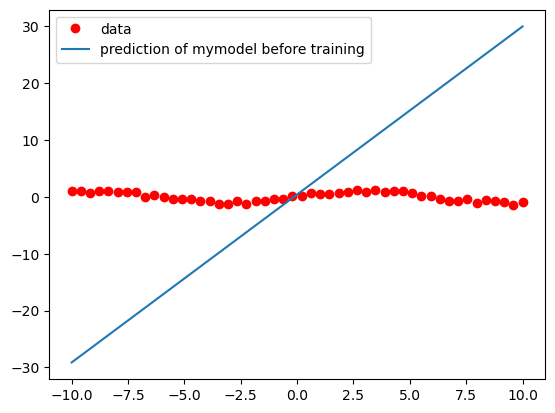

In [ ]:
# Now let's create some simple synthetic data
import numpy as np
import matplotlib.pyplot as plt

N_samples = 50
x = torch.linspace(-10,10,N_samples,dtype=torch.float) 
x = x[:,None]
y = torch.sin(0.5*x) + np.random.randn(N_samples,1)*0.2


prediction = mymodel(x).detach().numpy()
plt.plot(x,y,'ro')
plt.plot(x,prediction)
plt.legend(['data','prediction of mymodel before training'])



Since we will be running SGD, we need to do batching. Therefore, let's convert the training data tensors into Dataset objects. 

In [ ]:

import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset): 
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return (self.x[idx],self.y[idx])


In [ ]:
mydataset = MyDataset(x,y) # generate a Dataset based on x,y

# Randomly split dataset into train and validate dataset
dataset_len = len(mydataset)
train_dataset_len = round(dataset_len*0.8)
validate_dataset_len = dataset_len - train_dataset_len
train_dataset,validate_dataset = torch.utils.data.random_split(mydataset,[train_dataset_len, validate_dataset_len])



## 4.4 Training Neural Network via Stochastic Gradient Descent

Overall, the training loop is almost identical as before, which is a nested for-loop. In each training iteration in the training loop, recall we have the following steps. 

- First the prediction is computed based on the input variable of a small batch of the training data set (obtained from DataLoader). 
- Then, the prediction, together with the true output, is used to compute the loss.
- Then, we run the optimizer.zero_grad(), which clears the gradient computed from the previous loop. 
- Then, we run loss.backward() which calculates the gradient of the loss w.r.t. the parameters
- Finally, optimizer.step() conducts a gradient step

One difference this time is that at the end of each epoch, we also calculate the validation loss using the validation dataset. This is a common practice in deep learning. 

The code below also saves the traning process as a GIF file so that you can visualize the training process. 


In [31]:
# Now let's do the training!
import io
# import imageio
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

mymodel = myMultiLayerPerceptron_2(1,1) # creating a model instance with input dimension 1

# Three hyper parameters for training
lr = .04
batch_size = 10
N_epochs = 160

# Create dataloaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
validate_dataloader = DataLoader(validate_dataset,batch_size = batch_size,shuffle = True)

# Create optimizer
optimizer = torch.optim.SGD(mymodel.parameters(), lr = lr) # this line creates a optimizer, and we tell optimizer we are optimizing the parameters in mymodel


frames = [] # This variable stores all images to be saved to the GIF file

losses = [] # training losses of each epoch
validate_losses = [] # validation losses of each epoch
losses_all = [] # training losses of each SGD iteration

gd_steps = 0
N_batches = len(train_dataloader)

for epoch in range(N_epochs):
    batch_loss = []
    for batch_id, (x_batch, y_batch) in enumerate(train_dataloader):
        gd_steps+=1
        # pass input data to get the prediction outputs by the current model
        prediction = mymodel(x_batch)

        # compare prediction and the actual output and compute the loss
        loss = torch.mean((prediction - y_batch)**2)

        # compute the gradient
        optimizer.zero_grad()
        loss.backward()

        # update parameters
        optimizer.step()


        # Generate visualization plots
        fig, ax = plt.subplots(nrows = 1, ncols = 3)
        canvas = FigureCanvas(fig)
        ax[0].plot(x,y,'ro')
        prediction_full = mymodel(x)
        ax[0].plot(x,prediction_full.detach(),linewidth = 2)
        ax[0].legend(['data','prediction of mymodel'],loc = 'upper left')
        ax[0].set_title(f"Batch size = {batch_size}, Learning rate = {lr}, Epoch #{epoch}, Batch #{batch_id}", fontsize = 20)
        ax[0].set_xlim((-10,10))
        ax[0].set_ylim((-2,2))
        losses_all.append(loss.detach().numpy())
        ax[1].plot(np.arange(gd_steps),np.array(losses_all).squeeze(),linewidth=2 )
        ax[1].set_xlim((0,(N_epochs+1)*(N_batches)))
        ax[1].set_ylim((0,2))
        ax[1].set_title("Train loss per iteration", fontsize = 20)
        ax[1].set_xlabel("# of SGD Iterations", fontsize = 20)

        batch_loss.append(loss.detach().numpy())
        if epoch>0:
            ax[2].plot(np.arange(epoch),np.array(losses).squeeze(),linewidth=2, label = 'train loss' )
            ax[2].plot(np.arange(epoch),np.array(validate_losses).squeeze(),linewidth=2, label = 'validate loss')
            ax[2].legend(fontsize = 20)
        
        ax[2].set_xlim((0,N_epochs-1))
        ax[2].set_ylim((0,2))
        ax[2].set_title("Train/validate loss per epoch", fontsize = 20)
        ax[2].set_xlabel("# of Epochs", fontsize = 20)
        fig.set_size_inches(27,9) 
        canvas.draw()       # draw the canvas, cache the renderer

        image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')

        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        frames.append(image)
        plt.close(fig)
    
    # Calculate Validation Loss
    validate_batch_loss = []
    for x_batch, y_batch in validate_dataloader:
        # pass input data to get the prediction outputs by the current model
        prediction = mymodel(x_batch)

        # compare prediction and the actual output and compute the loss
        loss = torch.mean((prediction - y_batch)**2)
        validate_batch_loss.append(loss.detach())

    validate_losses.append( np.mean(np.array(validate_batch_loss)))
    losses.append(np.mean(np.array(batch_loss)))

print("Saving GIF file")
with imageio.get_writer("MLPSGD.gif", mode="I") as writer:
    for frame in frames:
        writer.append_data(frame)



Saving GIF file


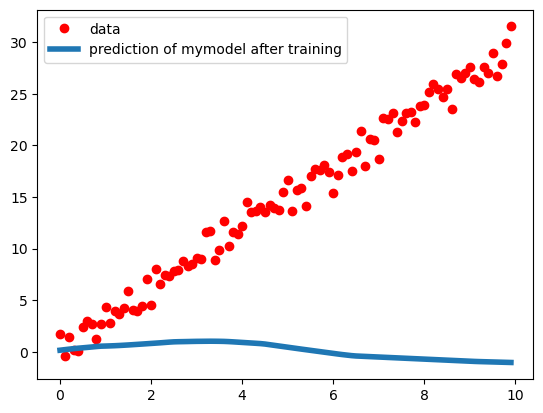

In [30]:
# let's see how the model looks like!


prediction = mymodel(x).detach().numpy()
plt.plot(x,y,'ro')
plt.plot(x,prediction,linewidth = 4)
plt.legend(['data','prediction of mymodel after training'])

